# 🎯 Paso 4: Discusión y Reflexión en grupos

Después de evaluar los conjuntos de datos, los estudiantes discuten:
 
* ¿Qué dataset es más útil para proyectos de ciberseguridad?
* ¿Cuáles son los desafíos al trabajar con estos datos?
* ¿Cómo podríamos mejorar la calidad de estos datasets?

# 0. Formato del Excel a subirse

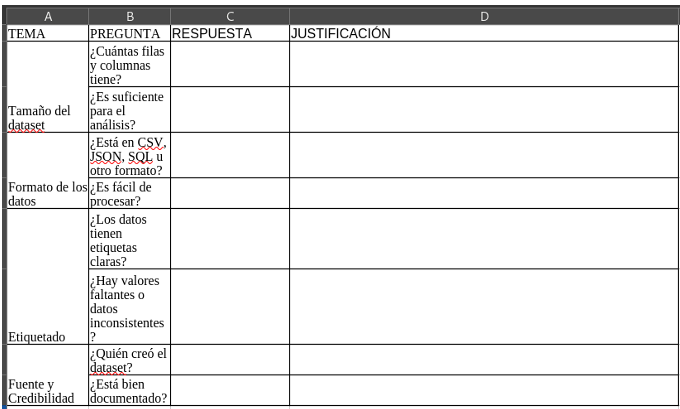

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cybersecurity-incidents-dataset/LossFromNetCrime.csv


# 1. Tamaño del dataset
  
# Pandas

 * **Paso 1:** Importa Pandas y carga el dataset.
   
 * **Paso 2:** Evalúa si el tamaño es suficiente para el análisis.

NOTA: Si el dataset es pequeño (<1 GB), Pandas es ideal.

In [2]:
#import pandas as pd (Pandas ya fue importando en la sección por defecto del notebook)

# Cargar el dataset (supongamos que está en formato CSV) 
df_pandas = pd.read_csv("/kaggle/input/cybersecurity-incidents-dataset/LossFromNetCrime.csv") 

# Mostrar el tamaño del dataset 
print(df_pandas.shape)
print(f"Tamaño del dataset: {df_pandas.shape[0]} filas y {df_pandas.shape[1]} columnas") 

(117, 13)
Tamaño del dataset: 117 filas y 13 columnas


In [3]:
df_pandas.head()

,Country,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
0,PR,655,5929974,1338,7209755,1785,9463928,1594,17211758,1817,21018302,1974,31545772
1,PS,1784,22483591,2890,25423219,3352,48918464,3210,57796003,3378,69292891,3811,66002407
2,PT,1119,13870074,2020,12391290,2102,18205913,1918,30859319,2178,28700418,2209,40192274
3,PY,1913,10967865,2992,13815152,3188,26677869,3768,40114594,3487,33579643,2678,45168957
4,AE,5503,48101706,7390,81178182,10164,131934602,10042,187062157,11034,244238485,12071,280815215


In [4]:
print(df_pandas.isnull().sum())

Country            1
2019_Complaints    0
2019_Losses        0
2020_Complaints    0
2020_Losses        0
2021_Complaints    0
2021_Losses        0
2022_Complaints    0
2022_Losses        0
2023_Complaints    0
2023_Losses        0
2024_Complaints    0
2024_Losses        0
dtype: int64


In [5]:
df= pd.read_csv("/kaggle/input/cybersecurity-incidents-dataset/LossFromNetCrime.csv")
num_filas, num_columnas= df.shape
print(f"El txt tiene {num_filas} filas y {num_columnas} columnas")

El txt tiene 117 filas y 13 columnas


In [6]:
with open('/kaggle/input/cybersecurity-incidents-dataset/LossFromNetCrime.csv','r') as archivo:
    primera_linea=archivo.readline()
    print(primera_linea)

Country,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses



# Polars

* **Paso 1:** Importa Polars y carga el dataset.

* **Paso 2:** Evalúa si el tamaño es suficiente.

NOTA: Polars es más eficiente que Pandas para datasets medianos/grandes (>1 GB) debido a su implementación en Rust.

In [7]:
import polars as pl 

# Cargar el dataset 
df_polars = pl.read_csv("/kaggle/input/cybersecurity-incidents-dataset/LossFromNetCrime.csv") 

# Mostrar el tamaño del dataset 
print(f"Tamaño del dataset: {df_polars.height} filas y {df_polars.width} columnas")

Tamaño del dataset: 117 filas y 13 columnas


In [8]:
import dask.dataframe as dd
df_dask= dd.read_csv("/kaggle/input/cybersecurity-incidents-dataset/LossFromNetCrime.csv", dtype={"columna1":str, "columna2": int},assume_missing=True)

# Dask

* **Paso 1:** Importa Dask y carga el dataset.
* **Paso 2:** Evalúa si el tamaño es suficiente.

NOTA: Dask es ideal para datasets muy grandes (>10 GB) porque maneja datos en paralelo.  Dask tiene sus particularidades.

In [9]:
import dask.dataframe as dd 

# Cargar el dataset 
df_dask = dd.read_csv("/kaggle/input/cybersecurity-incidents-dataset/LossFromNetCrime.csv") 

# Mostrar el tamaño del dataset 
print(f"Tamaño del dataset: {len(df_dask)} filas y {len(df_dask.columns)} columnas")

Tamaño del dataset: 117 filas y 13 columnas


# 2. Tipos de datos inconsistentes en pd.read_csv()
 
Al leer un archivo CSV con Dask, si hay columnas con datos de tipos mixtos (por ejemplo, una columna con números y strings), Dask lanza un error.dtypes no coinciden con los que se detectaron en el archivo.

In [10]:
df_dask = dd.read_csv("/kaggle/input/cybersecurity-incidents-dataset/LossFromNetCrime.csv", dtype=
 {"columna1": str, "columna2": float}, assume_missing=True)

**Dask trabaja con datos de forma perezosa ("lazy evaluation")**

* **df_dask** es un DataFrame distribuido, y su tamaño no está cargado en memoria inmediatamente.
* **len(df_dask)** intenta obtener el número de filas, pero Dask no ha procesado los datos aún.

In [11]:
print(f"Tamaño del dataset:{df_dask.shape[0].compute()} filas y {len(df_dask.columns)}columnas")

Tamaño del dataset:117 filas y 13columnas


# 3. Etiquetado

# Pandas

* **Paso 1:** Verifica las etiquetas

In [12]:
# Mostrar las primeras filas 
print(df_pandas.head()) 

# Verificar nombres de columnas 
print(df_pandas.columns) 

# Identificar valores faltantes 
print(df_pandas.isnull().sum())

  Country  2019_Complaints  2019_Losses  2020_Complaints  2020_Losses  \
0      PR              655      5929974             1338      7209755   
1      PS             1784     22483591             2890     25423219   
2      PT             1119     13870074             2020     12391290   
3      PY             1913     10967865             2992     13815152   
4      AE             5503     48101706             7390     81178182   

   2021_Complaints  2021_Losses  2022_Complaints  2022_Losses  \
0             1785      9463928             1594     17211758   
1             3352     48918464             3210     57796003   
2             2102     18205913             1918     30859319   
3             3188     26677869             3768     40114594   
4            10164    131934602            10042    187062157   

   2023_Complaints  2023_Losses  2024_Complaints  2024_Losses  
0             1817     21018302             1974     31545772  
1             3378     69292891           

* **Paso 2:** Limpia los datos.

In [13]:
# Rellenar valores faltantes 
df_pandas.fillna(0, inplace=True) 

# Eliminar filas con valores inconsistentes 
df_pandas.dropna(inplace=True)

# Polars

* **Paso 1:** Verifica las etiquetas

In [14]:
# Mostrar las primeras filas 
print(df_polars.head()) 

# Verificar nombres de columnas 
print(df_polars.columns) 

# Identificar valores faltantes 
print(df_polars.null_count()) 

shape: (5, 13)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ 2019_Compl ┆ 2019_Loss ┆ 2020_Comp ┆ … ┆ 2023_Comp ┆ 2023_Loss ┆ 2024_Comp ┆ 2024_Loss │
│ ---     ┆ aints      ┆ es        ┆ laints    ┆   ┆ laints    ┆ es        ┆ laints    ┆ es        │
│ str     ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆ i64        ┆ i64       ┆ i64       ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ PR      ┆ 655        ┆ 5929974   ┆ 1338      ┆ … ┆ 1817      ┆ 21018302  ┆ 1974      ┆ 31545772  │
│ PS      ┆ 1784       ┆ 22483591  ┆ 2890      ┆ … ┆ 3378      ┆ 69292891  ┆ 3811      ┆ 66002407  │
│ PT      ┆ 1119       ┆ 13870074  ┆ 2020      ┆ … ┆ 2178      ┆ 28700418  ┆ 2209      ┆ 40192274  │
│ PY      ┆ 1913       ┆ 10967865  ┆ 2992      ┆ … ┆ 3487      ┆ 33579643  ┆

* **Paso 2:** Limpia los datos.

In [15]:
# Rellenar valores faltantes
df_polars = df_polars.fill_null(0) 

# Eliminar filas con valores inconsistentes 
df_polars = df_polars.drop_nulls()

# Dask

* **Paso 1:** Verifica las etiquetas

In [16]:
# Mostrar las primeras filas 
print(df_dask.head()) 

# Verificar nombres de columnas 
print(df_dask.columns) 

# Identificar valores faltantes 
print(df_dask.isnull().sum().compute()) 

  Country  2019_Complaints  2019_Losses  2020_Complaints  2020_Losses  \
0      PR            655.0    5929974.0           1338.0    7209755.0   
1      PS           1784.0   22483591.0           2890.0   25423219.0   
2      PT           1119.0   13870074.0           2020.0   12391290.0   
3      PY           1913.0   10967865.0           2992.0   13815152.0   
4      AE           5503.0   48101706.0           7390.0   81178182.0   

   2021_Complaints  2021_Losses  2022_Complaints  2022_Losses  \
0           1785.0    9463928.0           1594.0   17211758.0   
1           3352.0   48918464.0           3210.0   57796003.0   
2           2102.0   18205913.0           1918.0   30859319.0   
3           3188.0   26677869.0           3768.0   40114594.0   
4          10164.0  131934602.0          10042.0  187062157.0   

   2023_Complaints  2023_Losses  2024_Complaints  2024_Losses  
0           1817.0   21018302.0           1974.0   31545772.0  
1           3378.0   69292891.0           

* **Paso 2:** Limpia los datos.

In [17]:
# Rellenar valores faltantes
df_dask = df_dask.fillna(0) 

# Eliminar filas con valores inconsistentes 
df_dask = df_dask.dropna()

# Conclusión

* Usa Pandas para datasets pequeños y análisis rápidos.
* Usa Polars para datasets medianos/grandes y mayor eficiencia.
* Usa Dask para datasets muy grandes y análisis distribuidos.